# Walmart Sales

/var/folders/1w/q8jk44s96hv8_f3y01bn7gsc0000gn/T/ipykernel_1820/3955391075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_6_data['Date'] = pd.to_datetime(store_6_data['Date'], format='%d-%m-%Y')
/var/folders/1w/q8jk44s96hv8_f3y01bn7gsc0000gn/T/ipykernel_1820/3955391075.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_6_data['Weekly_Sales_Million'] = store_6_data['Weekly_Sales'] / 1_000_000


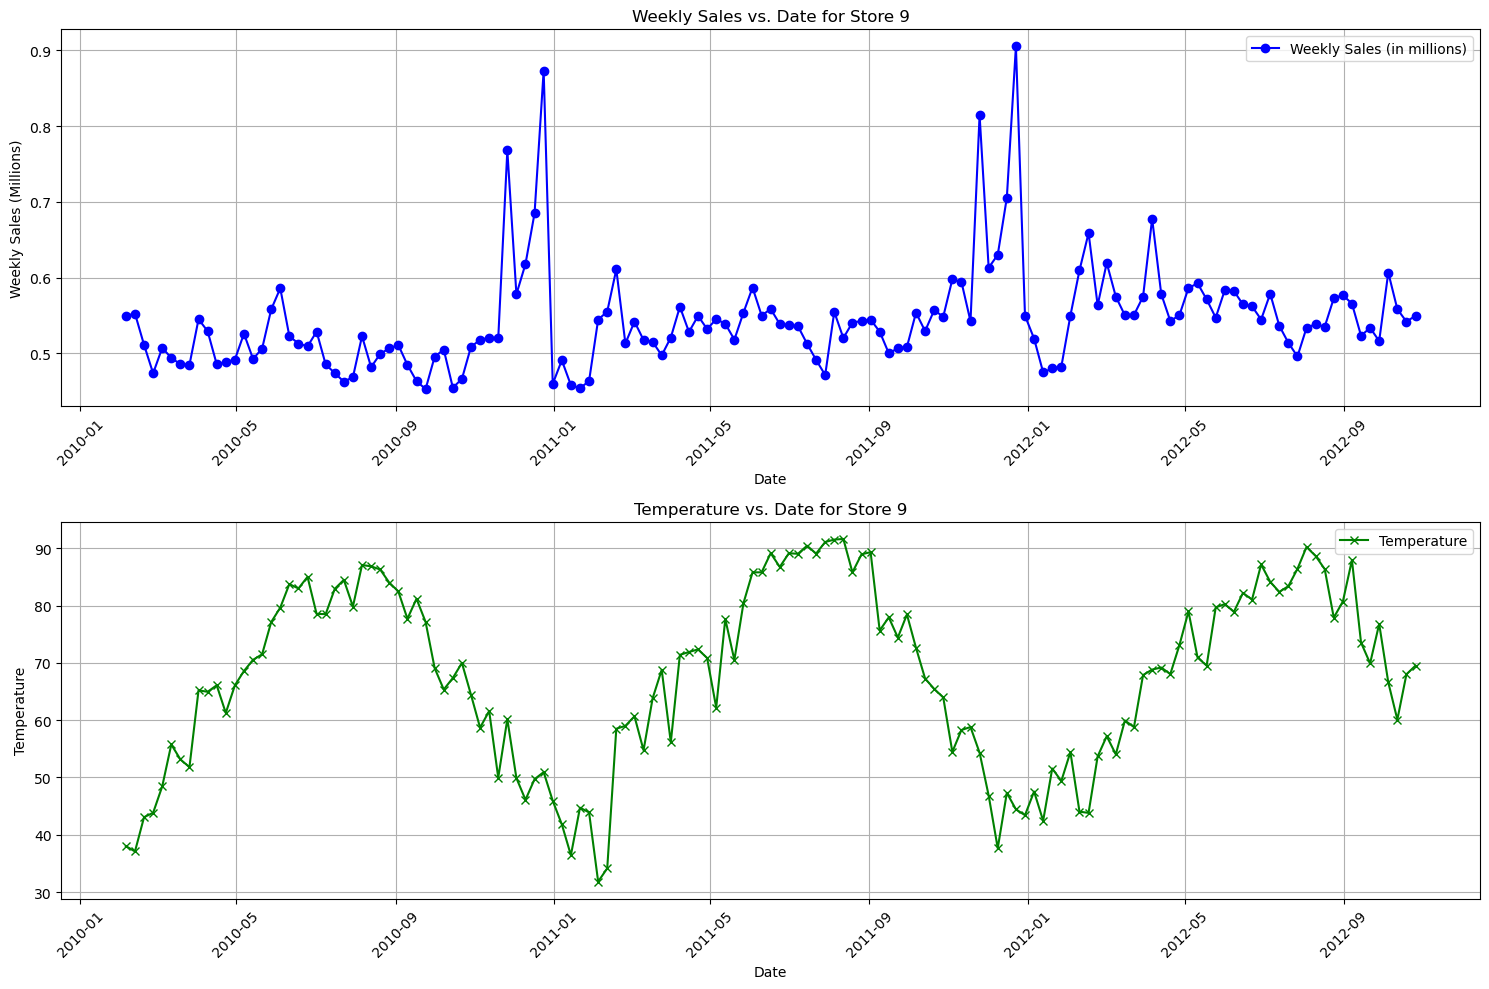

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
walmart_dataset = pd.read_csv('Walmart_Sales.csv')

# Filter for Store 6 only (or another store as needed)
store_6_data = walmart_dataset[walmart_dataset['Store'] == 9]

# Convert the 'Date' column to datetime
store_6_data['Date'] = pd.to_datetime(store_6_data['Date'], format='%d-%m-%Y')

# Divide Weekly Sales by a million
store_6_data['Weekly_Sales_Million'] = store_6_data['Weekly_Sales'] / 1_000_000

# Create subplots with 2 rows and 1 column for the two charts
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot Weekly Sales vs Date
axes[0].plot(store_6_data['Date'], store_6_data['Weekly_Sales_Million'], color='blue', marker='o', linestyle='-', label='Weekly Sales (in millions)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Weekly Sales (Millions)')
axes[0].set_title('Weekly Sales vs. Date for Store 9')
axes[0].tick_params(axis='x', rotation=45)  # Rotate date labels for better readability
axes[0].legend()
axes[0].grid(True)  # Add grid to the first plot

# Plot Temperature vs Weekly Sales
axes[1].plot(store_6_data['Date'], store_6_data['Temperature'], color='green', marker='x', linestyle='-', label='Temperature')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature vs. Date for Store 9')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True)  # Add grid to the second plot

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


/var/folders/1w/q8jk44s96hv8_f3y01bn7gsc0000gn/T/ipykernel_3165/1676584441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_9_data['Date'] = pd.to_datetime(store_9_data['Date'], format='%d-%m-%Y')
/var/folders/1w/q8jk44s96hv8_f3y01bn7gsc0000gn/T/ipykernel_3165/1676584441.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_9_data['Weekly_Sales_Million'] = store_9_data['Weekly_Sales'] / 1_000_000


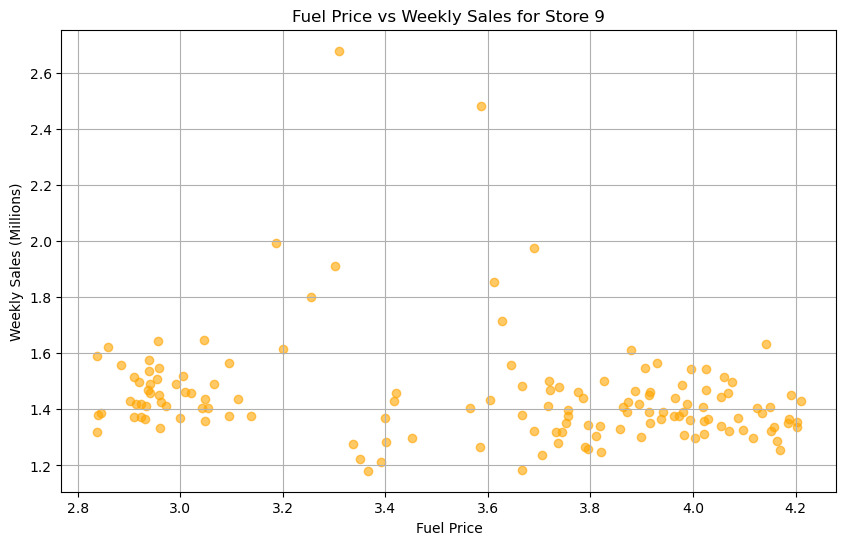

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
walmart_dataset = pd.read_csv('Walmart_Sales.csv')

# Filter for Store 9 only
store_9_data = walmart_dataset[walmart_dataset['Store'] == 19]

# Convert the 'Date' column to datetime
store_9_data['Date'] = pd.to_datetime(store_9_data['Date'], format='%d-%m-%Y')

# Divide Weekly Sales by a million
store_9_data['Weekly_Sales_Million'] = store_9_data['Weekly_Sales'] / 1_000_000

# Create a scatter plot for Fuel Price vs Weekly Sales
plt.figure(figsize=(10, 6))
plt.scatter(store_9_data['Fuel_Price'], store_9_data['Weekly_Sales_Million'], color='orange', alpha=0.6)
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales (Millions)')
plt.title('Fuel Price vs Weekly Sales for Store 9')
plt.grid(True)  # Add grid for readability

# Show the plot
plt.show()


[*********************100%%**********************]  6 of 6 completed


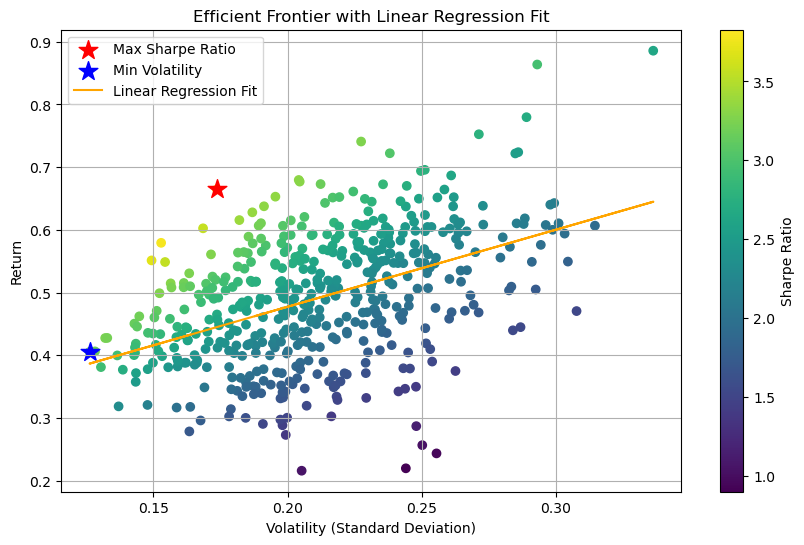

Optimal Weights (Max Sharpe Ratio):
NVDA: 10.10%
WMT: 0.99%
AMD: 20.45%
SPY: 21.08%
AAPL: 1.04%
COST: 46.36%

Linear Regression Equation: Return = 1.2289 * Volatility + 0.2317

Root Mean Squared Error (RMSE): 0.0899


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the stock tickers and time range for historical data
tickers = ['NVDA', 'WMT', 'AMD', 'SPY', 'AAPL', 'COST']
start_date = '2023-12-09'
end_date = datetime.today().strftime('%Y-%m-%d')

# Download adjusted close price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns and mean returns, and covariance matrix
returns = data.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Simulate random portfolios
num_portfolios = 500
results = np.zeros((3, num_portfolios))  # 3 rows: return, volatility, Sharpe ratio
weights_record = []

for i in range(num_portfolios):
    # Generate random portfolio weights (sum = 1)
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights
    weights_record.append(weights)
    
    # Calculate annualized portfolio return and volatility
    portfolio_return = np.dot(weights, mean_returns) * 252  # 252 trading days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility
    
    # Calculate Sharpe ratio (risk-free rate assumed 0)
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    # Store results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Find the portfolios with the maximum Sharpe ratio and minimum volatility
max_sharpe_idx = np.argmax(results[2])
min_volatility_idx = np.argmin(results[1])

# Efficient portfolios (maximum Sharpe ratio and minimum volatility)
max_sharpe_portfolio = results[:, max_sharpe_idx]
min_volatility_portfolio = results[:, min_volatility_idx]
best_weights = weights_record[max_sharpe_idx]

# Fit linear regression (Efficient Frontier: volatility vs return)
lr = LinearRegression()
lr.fit(results[1, :].reshape(-1, 1), results[0, :])  # Fit return as a function of volatility

# Predict returns based on the fitted model (efficient frontier)
predicted_returns = lr.predict(results[1, :].reshape(-1, 1))

# Calculate the Root Mean Squared Error (RMSE) for the regression fit
rmse = np.sqrt(mean_squared_error(results[0, :], predicted_returns))

# Plot the efficient frontier with linear regression fit
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='b', marker='*', s=200, label='Min Volatility')
plt.plot(results[1, :], predicted_returns, color='orange', linestyle='-', label='Linear Regression Fit')

# Labels and title
plt.title('Efficient Frontier with Linear Regression Fit')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Output optimal weights for maximum Sharpe ratio
print("Optimal Weights (Max Sharpe Ratio):")
for ticker, weight in zip(tickers, best_weights):
    print(f"{ticker}: {weight * 100:.2f}%")

# Output the linear regression equation
print(f"\nLinear Regression Equation: Return = {lr.coef_[0]:.4f} * Volatility + {lr.intercept_:.4f}")

# Output the RMSE
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")

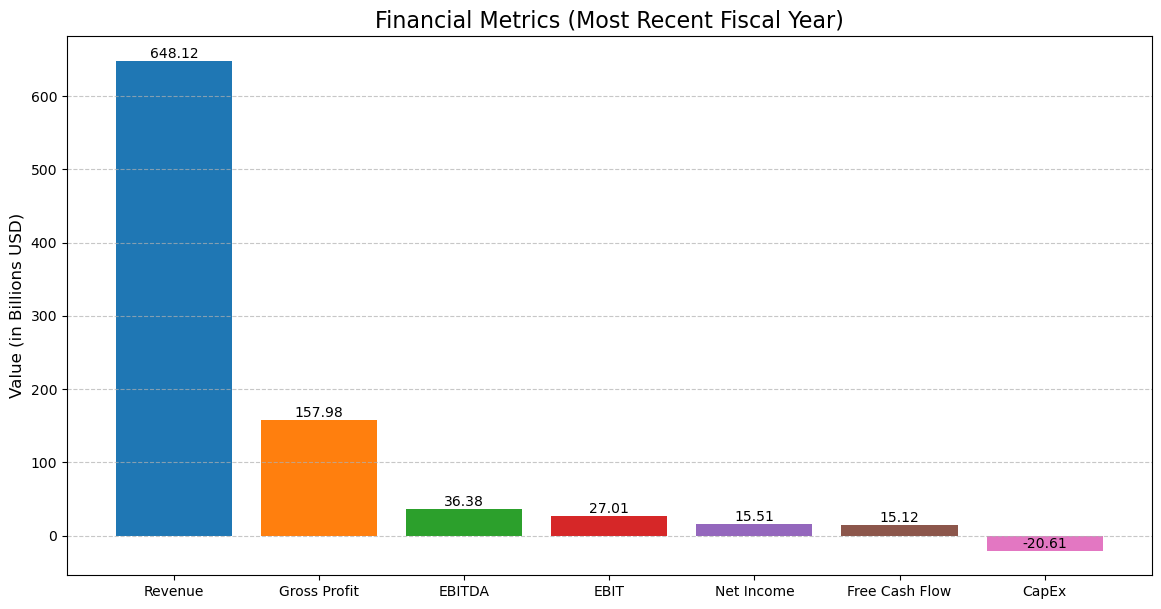

Date
1974-03-13 00:00:00-04:00    0.000033
1974-09-10 00:00:00-04:00    0.000033
1975-03-11 00:00:00-04:00    0.000020
1975-06-23 00:00:00-04:00    0.000020
1975-09-08 00:00:00-04:00    0.000020
                               ...   
2023-08-10 00:00:00-04:00    0.190000
2023-12-07 00:00:00-05:00    0.190000
2024-03-14 00:00:00-04:00    0.208000
2024-05-09 00:00:00-04:00    0.208000
2024-08-16 00:00:00-04:00    0.208000
Name: Dividends, Length: 201, dtype: float64


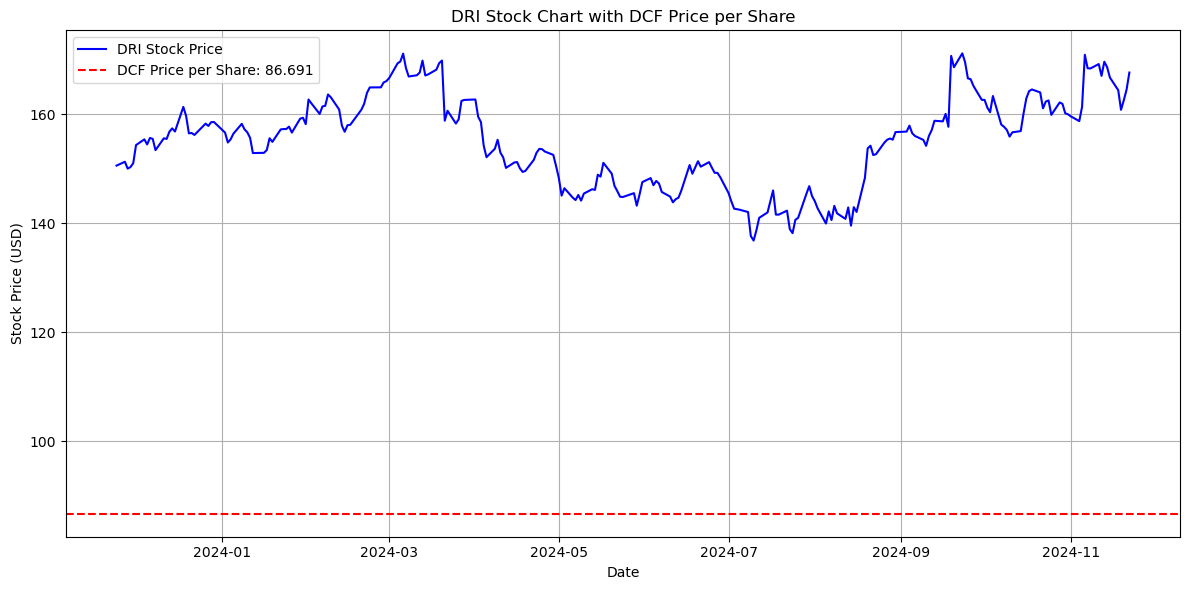

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Darden Restaurants (DRI) stock data
ticker = 'DRI'
stock = yf.Ticker(ticker)

# Download historical market data for the last year
data = stock.history(period="1y")

# Plot the stock's closing prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label=f"{ticker} Stock Price", color="blue")

# Add a horizontal line at 86.691 (DCF price per share)
dcf_price = 86.691
plt.axhline(y = 86.691, color="red", linestyle="--", label=f"DCF Price per Share: 86.691")

# Customize the chart
plt.title(f"{ticker} Stock Chart with DCF Price per Share")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import yfinance as yf

wmt = yf.Ticker('WMT')
print(wmt.info['sharesOutstanding'])

8038249984


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


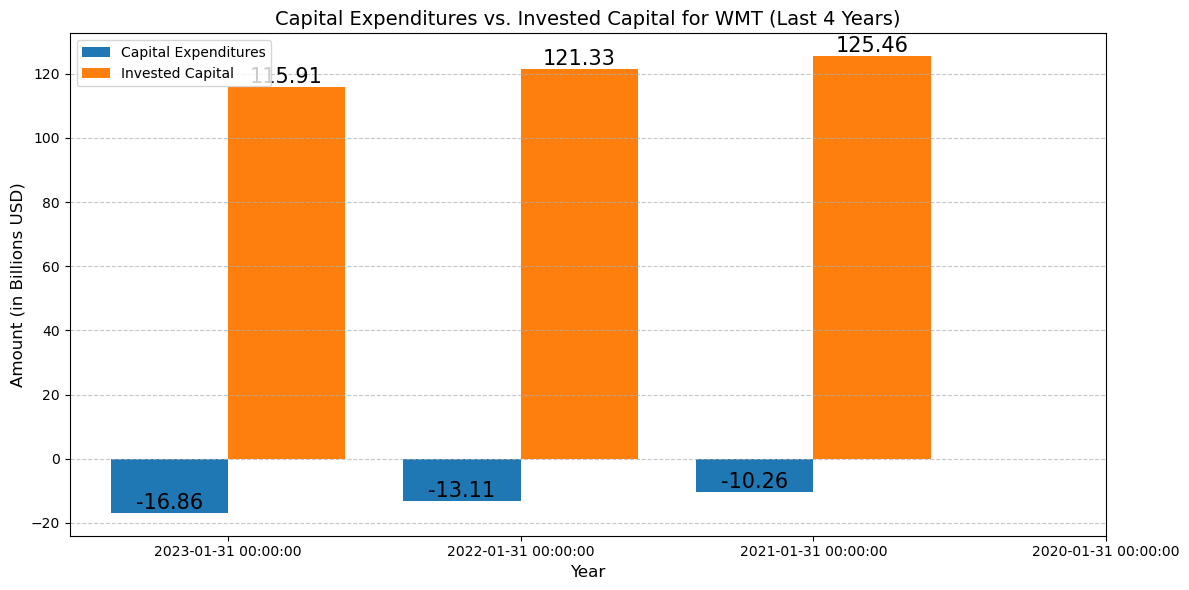

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker for the company (DRI)
ticker = "WMT"

# Fetch the financial data using yfinance
company_ticker = yf.Ticker(ticker)
balance_sheet = company_ticker.balance_sheet
cash_flow = company_ticker.cashflow

# Extract financial metrics
capital_expenditures = cash_flow.loc["Capital Expenditure"] / 1e9  # Convert to billions
invested_capital = balance_sheet.loc["Invested Capital"] / 1e9  # Convert to billions

# Filter the last 4 years
years = capital_expenditures.index[-4:]  # Get the last 4 years
capex_values = capital_expenditures[years].values
invested_capital_values = invested_capital[years].values

# Plot the data
plt.figure(figsize=(12, 6))
x = range(len(years))

# Bar chart for CapEx and Invested Capital
bar1 = plt.bar(x, capex_values, width=0.4, label="Capital Expenditures", color="#1f77b4")
bar2 = plt.bar([i + 0.4 for i in x], invested_capital_values, width=0.4, label="Invested Capital", color="#ff7f0e")

# Add values on top of the bars
for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=15)

for bar in bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=15)

# Add labels, title, and legend
plt.title(f"Capital Expenditures vs. Invested Capital for {ticker} (Last 4 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (in Billions USD)", fontsize=12)
plt.xticks([i + 0.2 for i in x], years, fontsize=10)
plt.legend(fontsize=10)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()
